# 전국 신규 민간 아파트 분양가격 동향
* 2015년 10월부터 2018년 7월까지
* 주택분양보증을 받아 분양한 전체 민간 신규아파트 분양가격 동향
* https://www.data.go.kr/dataset/3035522/fileData.do
* 이 튜토리얼은 아파트 분양가에 대한 분석보다 파이썬 데이터 분석 방법을 배우는데 목적을 두고 있습니다.
* 이 튜토리얼에서는 파이썬 데이터분석 도구인 Pandas를 활용합니다. Pandas에 대한 간략한 소개는 다음의 판다스 10분 완성 문서를 참고해 주시면 좋습니다. 
    * https://dataitgirls2.github.io/10minutes2pandas/
* 또 시각화 도구로는 grammer of graphics 문법을 활용할 수 있는 plotnine을 사용합니다.
* 이 튜토리얼은 데잇걸즈 2기와 파이콘 한국 2018에서 진행되기도 했습니다.
* 다음의 경로에서 온라인 분석도구인 Colaboratory의 사본을 생성해서 직접 실행하는 실습을 진행해 보실 수도 있습니다.
    * https://goo.gl/jSr7WU
* 데이터 다운로드 : https://goo.gl/oJydAv 

In [1]:
# 시각화 도구 설치
# !pip install plotnine
# !pip install missingno

# 아나콘다 사용시 
* Plotnine 설치 : https://anaconda.org/conda-forge/plotnine
* missingno 설치 : https://anaconda.org/conda-forge/missingno

In [2]:
!pip show plotnine

Name: plotnine
Version: 0.3.0
Summary: A grammar of graphics for python
Home-page: https://github.com/has2k1/plotnine
Author: Hassan Kibirige
Author-email: has2k1@gmail.com
License: GPL-2
Location: /Users/corazzon/codes/jupyter/lib/python3.6/site-packages
Requires: mizani, numpy, pandas, matplotlib, patsy, scipy, six, statsmodels
Required-by: 


In [3]:
!pip show missingno

Name: missingno
Version: 0.3.7
Summary: Missing data visualization module for Python.
Home-page: https://github.com/ResidentMario/missingno
Author: Aleksey Bilogur
Author-email: aleksey.bilogur@gmail.com
License: UNKNOWN
Location: /Users/corazzon/codes/jupyter/lib/python3.6/site-packages
Requires: numpy, matplotlib, scipy, seaborn
Required-by: 


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np
import re
from plotnine import *

%을 사용하면 터미널에서 사용할 수 있는 유닉스 명령어를 사용하실 수 있습니다.
경로를 불러오는 문제가 있을 때 이 방법을 사용하면 좋습니다.

In [6]:
# 현재 위치정보를 봅니다.
%pwd

'/Users/corazzon/codes/OpenDataWrangling'

In [7]:
# data 폴더 아래에 apt_price 라는 폴더를 만들어 공공데이터 포털에서 다운로드 받은 데이터를 모아 두었습니다. 해당 파일을 확인해 봅니다.
%ls data/apt_price/

전국_평균_분양가격_2018.6월_.csv
전국_평균_분양가격_2018.7월_.csv
지역별_3.3㎡당_평균_분양가격_15.4월_.csv
지역별_3.3㎡당_평균_분양가격_천원_.csv
지역별_3.3㎡당_평균_분양가격_천원__15.09월.csv
지역별_규모별_㎡당_평균_분양가격_천원__15.12월.csv
지역별_규모별_㎡당_평균_분양가격_천원__16.1월.csv
지역별_규모별_㎡당_평균_분양가격_천원__18.4월.csv


In [8]:
pre_sale = pd.read_csv('data/apt_price/전국_평균_분양가격_2018.7월_.csv', encoding='euc-kr')
pre_sale.shape

(2890, 5)

In [9]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [10]:
pre_sale.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
2885,제주,전체,2018,7,3334
2886,제주,전용면적 60㎡이하,2018,7,NaN
2887,제주,전용면적 60㎡초과 85㎡이하,2018,7,3356
2888,제주,전용면적 85㎡초과 102㎡이하,2018,7,3226
2889,제주,전용면적 102㎡초과,2018,7,2990


In [11]:
# 분양가격이 숫자 타입이 아닙니다. 숫자 타입으로 변경해줄 필요가 있겠어요.
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 5 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null int64
월          2890 non-null int64
분양가격(㎡)    2750 non-null object
dtypes: int64(2), object(3)
memory usage: 113.0+ KB


In [12]:
pre_sale.dtypes

지역명        object
규모구분       object
연도          int64
월           int64
분양가격(㎡)    object
dtype: object

In [13]:
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    140
dtype: int64

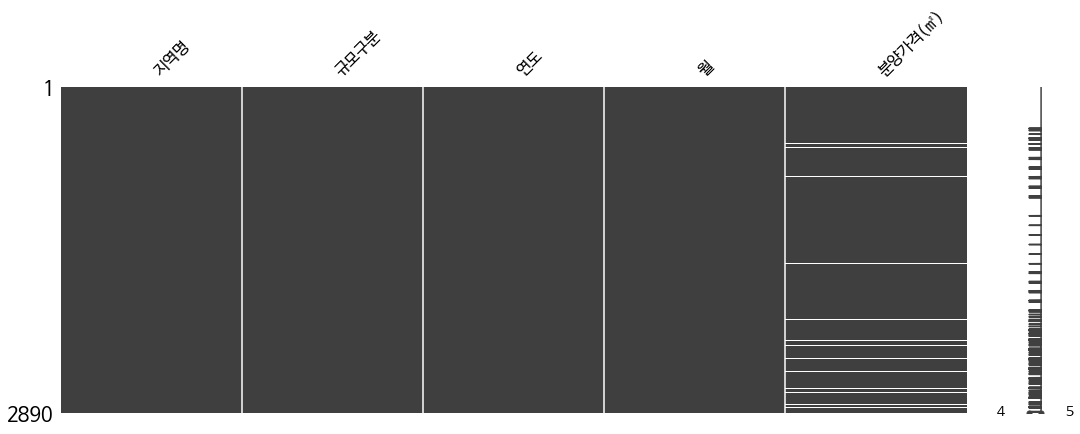

In [14]:
# 결측치 보기
import missingno as msno
msno.matrix(pre_sale, figsize=(18,6))

In [15]:
# 연도와 월은 카테고리 형태의 데이터이기 때문에 스트링 형태로 변경
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)

In [16]:
pre_sale_price = pre_sale['분양가격(㎡)']

In [17]:
# 분양가격의 타입을 숫자로 변경해 줍니다.
pre_sale['분양가격'] = pd.to_numeric(pre_sale_price, errors='coerce')
# 평당 분양가격을 구해볼까요.
pre_sale['평당분양가격'] = pre_sale['분양가격'] * 3.3

In [18]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 7 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null object
월          2890 non-null object
분양가격(㎡)    2750 non-null object
분양가격       2658 non-null float64
평당분양가격     2658 non-null float64
dtypes: float64(2), object(5)
memory usage: 158.1+ KB


In [19]:
pre_sale.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

In [20]:
# 분양가격에 결측치가 많이 있어요.
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    140
분양가격       232
평당분양가격     232
dtype: int64

In [21]:
pre_sale.describe()

,분양가격,평당분양가격
count,2658.000000,2658.000000
mean,3063.297216,10108.880813
std,1112.743769,3672.054436
min,1868.000000,6164.400000
25%,2348.000000,7748.400000
50%,2743.000000,9051.900000
75%,3293.750000,10869.375000
max,8098.000000,26723.400000


In [22]:
# pre_sale.describe?

In [23]:
pre_sale.describe(include=[np.object])

,지역명,규모구분,연도,월,분양가격(㎡)
count,2890,2890,2890,2890,2750
unique,17,5,4,12,1305
top,대구,전용면적 60㎡이하,2017,1,2221
freq,170,578,1020,255,17


In [24]:
# 2017년 데이터만 봅니다.
pre_sale_2017 = pre_sale.loc[pre_sale['연도'] == '2017']
pre_sale_2017.shape

(1020, 7)

In [25]:
# 같은 값을 갖고 있는 걸로 시도별로 동일하게 데이터가 들어 있는 것을 확인할 수 있습니다.
pre_sale['규모구분'].value_counts()

전용면적 60㎡이하           578
전용면적 60㎡초과 85㎡이하     578
전용면적 102㎡초과          578
전체                   578
전용면적 85㎡초과 102㎡이하    578
Name: 규모구분, dtype: int64

In [26]:
pre_sale['지역명'].value_counts()

대구    170
광주    170
경기    170
세종    170
인천    170
전북    170
충남    170
대전    170
제주    170
경북    170
강원    170
충북    170
경남    170
서울    170
부산    170
전남    170
울산    170
Name: 지역명, dtype: int64

# 전국평균 분양가격
* groupby 와 pivot_table 활용하기

In [27]:
pre_sale.groupby?

Signature: pre_sale.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, **kwargs)
Docstring:
Group series using mapper (dict or key function, apply given function
to group, return result as series) or by a series of columns.

Parameters
----------
by : mapping, function, str, or iterable
    Used to determine the groups for the groupby.
    If ``by`` is a function, it's called on each value of the object's
    index. If a dict or Series is passed, the Series or dict VALUES
    will be used to determine the groups (the Series' values are first
    aligned; see ``.align()`` method). If an ndarray is passed, the
    values are used as-is determine the groups. A str or list of strs
    may be passed to group by the columns in ``self``
axis : int, default 0
level : int, level name, or sequence of such, default None
    If the axis is a MultiIndex (hierarchical), group by a particular
    level or levels
as_index : boolean, default True
    For aggr

In [28]:
# 분양가격만 봤을 때 2015년에서 2018년으로 갈수록 오른 것을 확인할 수 있습니다.
pd.options.display.float_format = '{:,.0f}'.format
pre_sale.groupby(pre_sale.연도).describe().T

연도             2015   2016   2017   2018
분양가격   count    243    984    899    532
       mean   2,789  2,934  3,140  3,299
       std      977  1,071  1,108  1,196
       min    1,868  1,900  1,976  2,076
       25%    2,225  2,282  2,365  2,471
       50%    2,516  2,672  2,849  2,914
       75%    3,026  3,148  3,456  3,647
       max    7,092  8,096  7,887  8,098
평당분양가격 count    243    984    899    532
       mean   9,203  9,683 10,360 10,885
       std    3,224  3,536  3,655  3,947
       min    6,164  6,270  6,521  6,851
       25%    7,342  7,531  7,804  8,154
       50%    8,303  8,818  9,402  9,616
       75%    9,984 10,390 11,405 12,036
       max   23,404 26,717 26,027 26,723

## 규모별 전국 평균 분양가격

In [29]:
pre_sale.pivot_table?

Signature: pre_sale.pivot_table(values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
Docstring:
Create a spreadsheet-style pivot table as a DataFrame. The levels in
the pivot table will be stored in MultiIndex objects (hierarchical
indexes) on the index and columns of the result DataFrame

Parameters
----------
values : column to aggregate, optional
index : column, Grouper, array, or list of the previous
    If an array is passed, it must be the same length as the data. The
    list can contain any of the other types (except list).
    Keys to group by on the pivot table index.  If an array is passed,
    it is being used as the same manner as column values.
columns : column, Grouper, array, or list of the previous
    If an array is passed, it must be the same length as the data. The
    list can contain any of the other types (except list).
    Keys to group by on the pivot table column.  If an array is passed,
    it

In [30]:
pre_sale.pivot_table('평당분양가격', '규모구분', '연도')

연도,2015,2016,2017,2018
규모구분,,,,
전용면적 102㎡초과,"9,837","10,389","11,334","11,235"
전용면적 60㎡이하,"8,952","9,399","10,246","10,912"
전용면적 60㎡초과 85㎡이하,"8,892","9,296","9,825","10,464"
전용면적 85㎡초과 102㎡이하,"9,519","10,122","10,540","11,483"
전체,"8,893","9,293","9,901","10,563"


# 전국 분양가 변동금액
규모구분이 전체로 되어있는 금액으로 연도별 변동금액을 살펴봅니다.

In [31]:
# 규모구분에서 전체로 되어있는 데이터만 가져온다.
region_year_all = pre_sale.loc[pre_sale['규모구분'] == '전체']
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index()
region_year

연도,지역명,2015,2016,2017,2018
0,강원,"7,160","7,011","7,127","7,641"
1,경기,"10,377","11,220","11,850","12,881"
2,경남,"7,586","7,848","8,120","8,894"
3,경북,"7,171","7,361","7,795","8,342"
4,광주,"8,052","8,899","9,464","9,638"
5,대구,"9,232","10,310","11,456","11,737"
6,대전,"8,098","8,502","9,045","9,604"
7,부산,"10,307","10,430","11,578","12,756"
8,서울,"19,725","20,663","21,376","22,329"
9,세종,"8,750","8,860","9,135","10,375"


In [32]:
region_year['변동액'] = (region_year['2018'] - region_year['2015']).astype(int)
max_delta_price = np.max(region_year['변동액'])*1000
min_delta_price = np.min(region_year['변동액'])*1000
mean_delta_price = np.mean(region_year['변동액'])*1000

print('2015년부터 2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 {:,.0f}원이다.'.format(max_delta_price))
print('상승액이 가장 작은 지역은 울산이며 평당 {:,.0f}원이다.'.format(min_delta_price))
print('하지만 나중에 살펴보겠지만 울산에는 결측치가 많다. 따라서 변동액이 가장 작다라고 판단하기 어렵다.')
print('전국 평균 변동액은 평당 {:,.0f}원이다.'.format(mean_delta_price))

region_year

2015년부터 2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 5,087,000원이다.
상승액이 가장 작은 지역은 울산이며 평당 369,000원이다.
하지만 나중에 살펴보겠지만 울산에는 결측치가 많다. 따라서 변동액이 가장 작다라고 판단하기 어렵다.
전국 평균 변동액은 평당 1,669,588원이다.


연도,지역명,2015,2016,2017,2018,변동액
0,강원,"7,160","7,011","7,127","7,641",481
1,경기,"10,377","11,220","11,850","12,881",2503
2,경남,"7,586","7,848","8,120","8,894",1308
3,경북,"7,171","7,361","7,795","8,342",1171
4,광주,"8,052","8,899","9,464","9,638",1585
5,대구,"9,232","10,310","11,456","11,737",2504
6,대전,"8,098","8,502","9,045","9,604",1506
7,부산,"10,307","10,430","11,578","12,756",2449
8,서울,"19,725","20,663","21,376","22,329",2603
9,세종,"8,750","8,860","9,135","10,375",1624


* 지금까지 2015년 10월에서 2018년 7월까지의 21개월간의 전국 신규 민간 아파트 분양가격 동향 파일을 요약해 봤습니다.
* Pandas를 통해 데이터를 가져오고 요약해 보고 엑셀과 비슷하게 피봇테이블을 그려보기도 하고 groupby를 사용해서 데이터를 요약해 보기도 했습니다.

# 시각화

* 데이터를 시각화 해보기에 앞서 앤스콤의 4인방을 보겠습니다.
* 아래 4개의 그래프는 다른 데이터로 그려졌습니다.
* 또 이 4개의 데이터는 평균, 표준편차, 상관계수가 같습니다. 하지만 시각화 했을 때 전혀 다른 데이터임을 확인할 수 있습니다.
* 이 앤스콤의 4인방은 요약된 데이터만으로 데이터를 판단할 수 없다는 것을 보여줍니다.
* 데이터 시각화의 중요성을 얘기할 때 자주 등장하는 예시입니다.
* [Anscombe's quartet - Wikipedia](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
* [The Datasaurus Dozen - Same Stats, Different Graphs: Generating Datasets with Varied Appearance and Identical Statistics through Simulated Annealing | Autodesk Research](https://www.autodeskresearch.com/publications/samestats)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/990px-Anscombe%27s_quartet_3.svg.png)

## [A Grammar of Graphics for Python — plotnine](http://plotnine.readthedocs.io/en/stable/index.html)
* [tutorial](http://plotnine.readthedocs.io/en/stable/tutorials.html)
* [ggplot2-cheatsheet](https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf)
* 이미지 출처 : [A Comprehensive Guide to the Grammar of Graphics for Effective Visualization of Multi-dimensional…](https://towardsdatascience.com/a-comprehensive-guide-to-the-grammar-of-graphics-for-effective-visualization-of-multi-dimensional-1f92b4ed4149)

<img src="https://cdn-images-1.medium.com/max/2000/1*mcLnnVdHNg-ikDbHJfHDNA.png">

## 연도별 변동 그래프

* 공공데이터포털에서 제공하고 있는 평균 분양가격을 연도, 지역별로 그려봄
* 폰트 설정을 위해 Matplotlib의 환경설정에서 한글폰트 설정이 필요합니다.
* 폰트는 나눔고딕이 설치되어 있어서 나눔고딕을 불러왔지만, 각자의 환경에 맞는 폰트를 가져와야 합니다.
* 한글폰트를 지정해 주지 않는다면 글자가 두부모양으로 깨져보이게 됩니다.

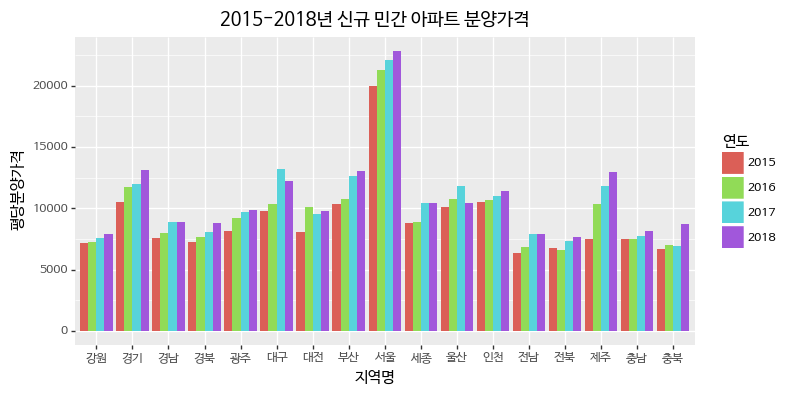

<ggplot: (-9223372036563779356)>

In [33]:
(ggplot(region_year_all, aes(x='지역명', y='평당분양가격', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('2015-2018년 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(8, 4))
)

## 지역별 평당 분양가격 합계
* 아래 데이터로 어느정도 규모로 분양사업이 이루어졌는지를 봅니다.
* 전체 데이터로 봤을 때 서울, 경기, 부산, 제주에 분양 사업이 다른 지역에 비해 규모가 큰 것으로 보여지지만 분양가격대비로 나눠볼 필요가 있습니다.

In [34]:
pre_sale.pivot_table('평당분양가격', '규모구분', '지역명')

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
규모구분,,,,,,,,,,,,,,,,,
전용면적 102㎡초과,"7,899","13,647","9,226","8,616","10,296","12,334","14,282","12,590","22,058","9,292","9,974","13,836","7,568","7,842","10,416","8,478","7,933"
전용면적 60㎡이하,"7,195","12,385","8,343","7,661","8,518","11,285","8,798","10,707","22,046","9,107","8,965","10,870","6,991","7,232","14,700","7,782","6,969"
전용면적 60㎡초과 85㎡이하,"7,228","11,691","8,110","7,690","9,176","10,931","8,807","11,191","20,781","9,272","10,641","10,748","6,968","6,891","9,943","7,504","7,044"
전용면적 85㎡초과 102㎡이하,"7,686","12,130","9,822","8,776","9,296","9,589","9,037","11,039","23,754","9,245","8,861","11,267","7,882","7,770","10,739","9,090","8,171"
전체,"7,197","11,706","8,137","7,696","9,167","10,897","8,880","11,295","21,169","9,263","10,619","10,739","6,982","6,902","10,253","7,494","6,994"


## 규모별 

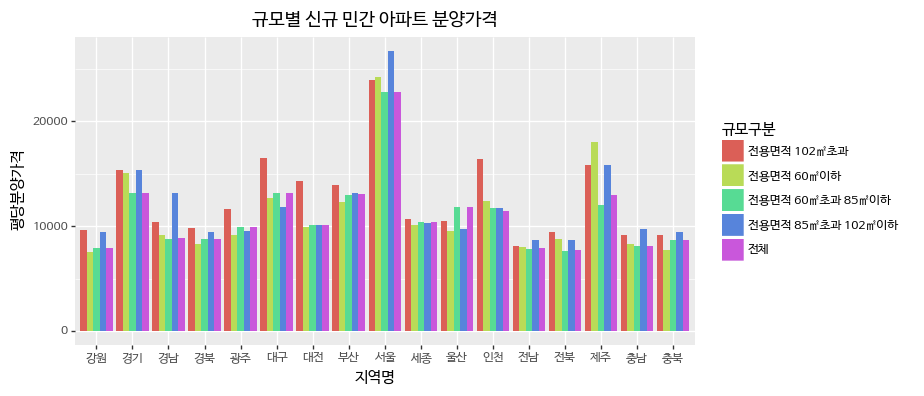

<ggplot: (292484472)>

In [35]:
# 서울의 경우 전용면적 85㎡초과 102㎡이하가 분양가격이 가장 비싸게 나옵니다.
(ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('규모별 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(8, 4))
)

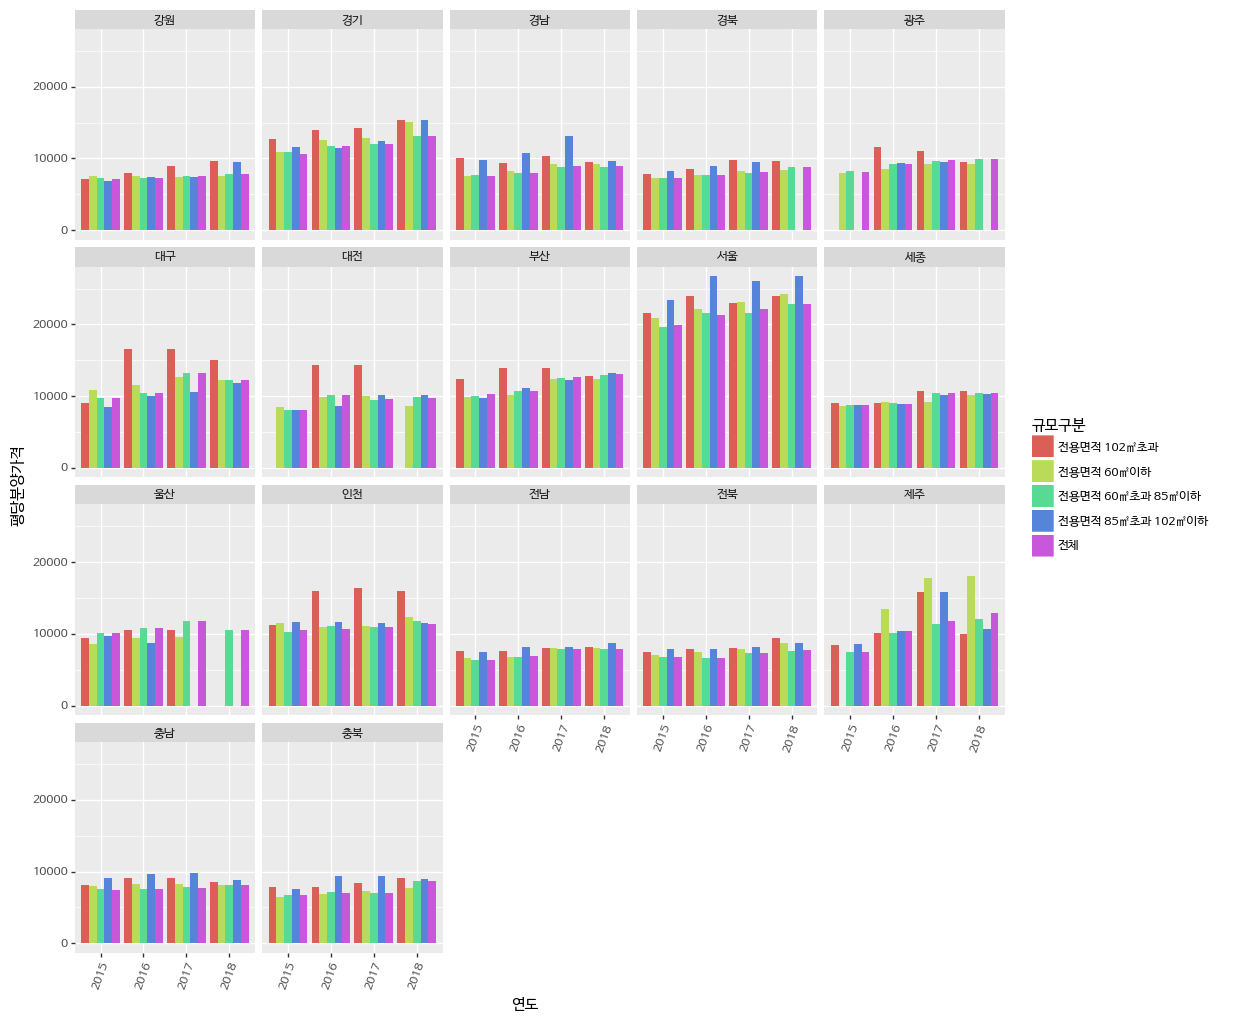

<ggplot: (-9223372036562342933)>

In [36]:
# 위에 그린 그래프를 지역별로 나눠 봅니다.
(ggplot(pre_sale)
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_bar(stat='identity', position='dodge')
 + facet_wrap('지역명')
 + theme(text=element_text(family='NanumBarunGothic'),
         axis_text_x=element_text(rotation=70),
         figure_size=(12, 12))
)

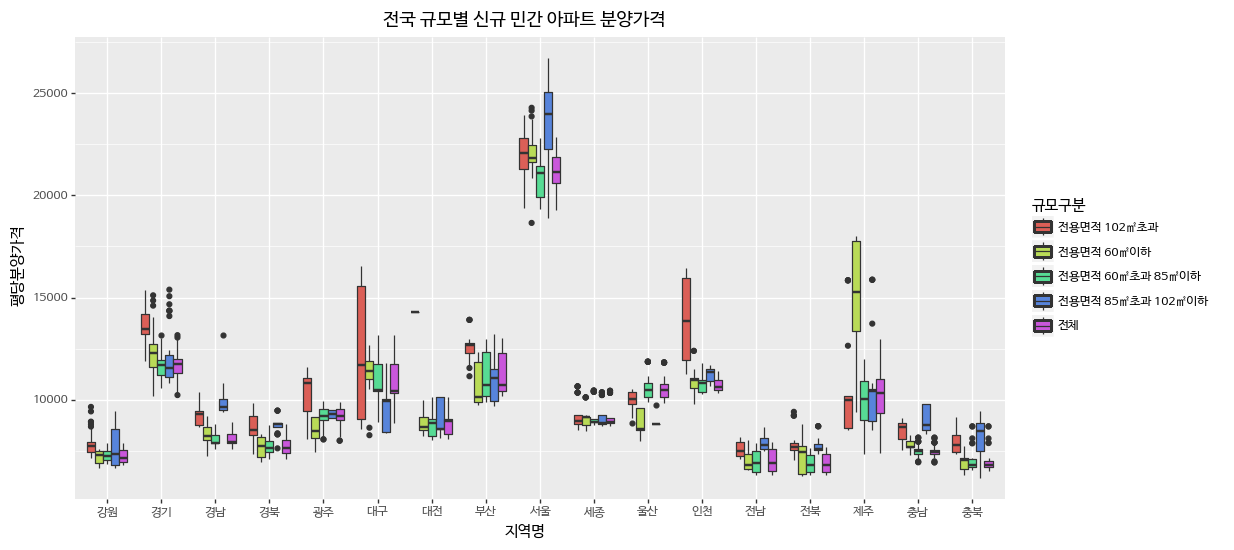

<ggplot: (293277809)>

In [37]:
# 박스플롯을 그려봅니다.
(ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
 + geom_boxplot()
 + ggtitle('전국 규모별 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(12, 6))
)

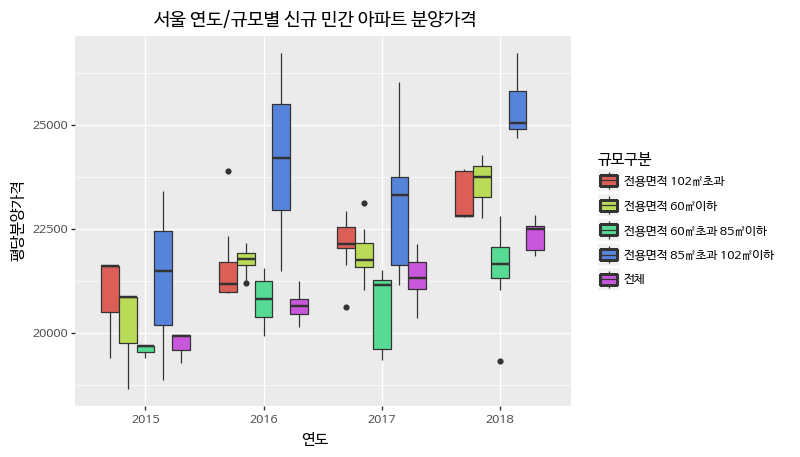

<ggplot: (-9223372036561227418)>

In [38]:
pre_sale_seoul = pre_sale.loc[pre_sale['지역명']=='서울']
(ggplot(pre_sale_seoul)
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + ggtitle('서울 연도/규모별 신규 민간 아파트 분양가격')
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'))
)

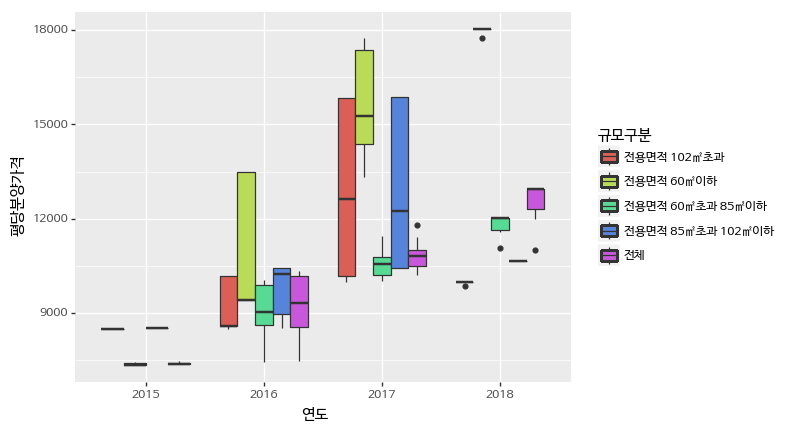

<ggplot: (293545564)>

In [39]:
# 2015년에서 2018년까지 분양가 차이가 가장 컸던 제주를 봅니다.
(ggplot(pre_sale.loc[pre_sale['지역명']=='제주'])
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'))
)

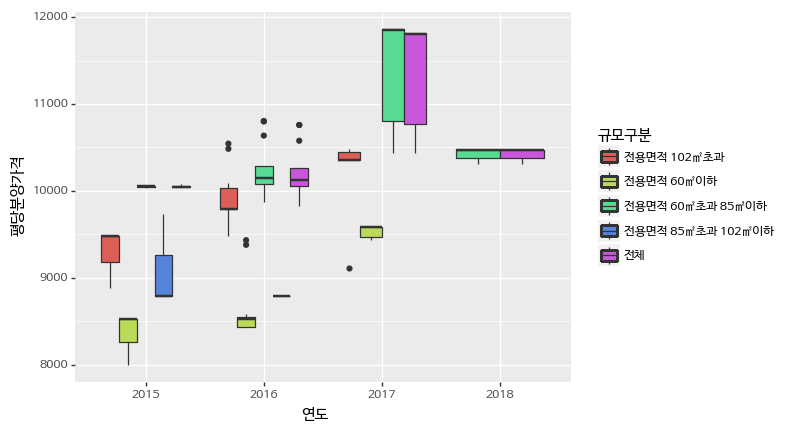

<ggplot: (-9223372036560773681)>

In [40]:
# 2015년에서 2018년까지 분양가 차이가 가장 작았던 울산을 봅니다.
# 실제로는 분양가 차이가 적은 것이 아니라 결측치로 인해 분양가 차이가 적게 보였습니다.
(ggplot(pre_sale.loc[pre_sale['지역명']=='울산'])
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'))
)

# Tidy Data 만들기
* [Tidy data - Wikipedia](https://en.wikipedia.org/wiki/Tidy_data)
## 2013년 12월~2015년 9월 3.3㎡당 분양가격
* 2015년 10월부터 2018년 4월까지 데이터는 평당 분양가로 조정을 해주었었는데 이 데이터는 평당 분양가가 들어가 있다.
* `지역별_3.3㎡당_평균_분양가격_천원__15.09월.csv`을  https://www.data.go.kr/dataset/3035522/fileData.do 에서 다운로드 받거나 다음의 경로에서 다운로드 받습니다. https://goo.gl/oJydAv

In [41]:
df = pd.read_csv('data/apt_price/지역별_3.3㎡당_평균_분양가격_천원__15.09월.csv', \
                 encoding='euc-kr', skiprows=1, header=0)
df.shape

(23, 27)

In [42]:
# pandas에서 보기 쉽게 컬럼을 변경해 줄 필요가 있다.
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,구분,NaN,2013년,2014년,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(단위: 천원/3.3㎡)
1,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,...,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722


In [43]:
year = df.iloc[0]
month = df.iloc[1]

In [44]:
# 결측치를 채워준다.
year

Unnamed: 0                구분
Unnamed: 1               NaN
Unnamed: 2             2013년
Unnamed: 3             2014년
Unnamed: 4               NaN
Unnamed: 5               NaN
Unnamed: 6               NaN
Unnamed: 7               NaN
Unnamed: 8               NaN
Unnamed: 9               NaN
Unnamed: 10              NaN
Unnamed: 11              NaN
Unnamed: 12              NaN
Unnamed: 13              NaN
Unnamed: 14              NaN
Unnamed: 15            2015년
Unnamed: 16              NaN
Unnamed: 17              NaN
Unnamed: 18              NaN
Unnamed: 19              NaN
Unnamed: 20              NaN
Unnamed: 21              NaN
Unnamed: 22              NaN
Unnamed: 23              NaN
Unnamed: 24              NaN
Unnamed: 25              NaN
Unnamed: 26    (단위: 천원/3.3㎡)
Name: 0, dtype: object

In [45]:
# 컬럼을 새로 만들어 주기 위해 0번째와 1번째 행을 합쳐준다.
for i, y in enumerate(year):
    if i > 2 and i < 15:
        year[i] = ' '.join(['2014년', month[i]])
    elif i >= 15:
        year[i] = ' '.join(['2015년', month[i]])
    elif i == 2 :
        year[i] = ' '.join([year[i], month[i]])
    elif i == 1:
        year[i] = '시군구'
        
print(year)

Unnamed: 0              구분
Unnamed: 1             시군구
Unnamed: 2       2013년 12월
Unnamed: 3        2014년 1월
Unnamed: 4        2014년 2월
Unnamed: 5        2014년 3월
Unnamed: 6        2014년 4월
Unnamed: 7        2014년 5월
Unnamed: 8        2014년 6월
Unnamed: 9        2014년 7월
Unnamed: 10       2014년 8월
Unnamed: 11       2014년 9월
Unnamed: 12      2014년 10월
Unnamed: 13      2014년 11월
Unnamed: 14      2014년 12월
Unnamed: 15       2015년 1월
Unnamed: 16       2015년 2월
Unnamed: 17       2015년 3월
Unnamed: 18       2015년 4월
Unnamed: 19       2015년 5월
Unnamed: 20       2015년 6월
Unnamed: 21       2015년 7월
Unnamed: 22       2015년 8월
Unnamed: 23       2015년 9월
Unnamed: 24      2015년 전월비
Unnamed: 25     2015년 전년말비
Unnamed: 26    2015년 전년동월비
Name: 0, dtype: object


In [46]:
df.columns = year

In [47]:
df = df.drop(df.index[[0,1]])
df

,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722
10,NaN,NaN,"8,151","8,355","8,597","8,552","8,585","8,606","8,669","8,648",...,"8,692","8,858","8,967","8,942","8,984","9,058","9,023",-36,325,352
11,경기,NaN,"10,855","10,855","10,791","10,784","10,876","10,646","10,266","10,124",...,"10,469","10,684","10,685","10,573","10,518","10,573","10,341",-232,-38,-160


In [48]:
# 지역 컬럼을 새로 만들어 시도와 시군구를 합쳐준다.
df['구분'] = df['구분'].fillna('')
df['시군구'] = df['시군구'].fillna('')

In [49]:
df['지역'] = df['구분'] + df['시군구']

In [50]:
df['지역']

2          전국
3          서울
4     6대광역시부산
5          대구
6          인천
7          광주
8          대전
9          울산
10           
11         경기
12        수도권
13         세종
14       지방강원
15         충북
16         충남
17         전북
18         전남
19         경북
20         경남
21         제주
22           
Name: 지역, dtype: object

In [51]:
melt_columns = df.columns.copy()
melt_columns

Index(['구분', '시군구', '2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월', '2014년 9월',
       '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월', '2015년 2월',
       '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월', '2015년 7월', '2015년 8월',
       '2015년 9월', '2015년 전월비', '2015년 전년말비', '2015년 전년동월비', '지역'],
      dtype='object', name=0)

In [52]:
df_2013_2015 = pd.melt(df, id_vars=['지역'], value_vars=['2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월',
       '2014년 9월', '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월',
       '2015년 2월', '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월',
       '2015년 7월', '2015년 8월', '2015년 9월'])
df_2013_2015.head()

,지역,0,value
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [53]:
df_2013_2015.columns = ['지역', '기간', '분양가']
df_2013_2015.head()

,지역,기간,분양가
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [54]:
df_2013_2015['연도'] = df_2013_2015['기간'].apply(lambda year_month : year_month.split('년')[0])
df_2013_2015['월'] = df_2013_2015['기간'].apply(lambda year_month : re.sub('월', '', year_month.split('년')[1]).strip())

In [55]:
df_2013_2015.head()

,지역,기간,분양가,연도,월
0,전국,2013년 12월,"8,059",2013,12
1,서울,2013년 12월,"18,189",2013,12
2,6대광역시부산,2013년 12월,"8,111",2013,12
3,대구,2013년 12월,"8,080",2013,12
4,인천,2013년 12월,"10,204",2013,12


## 지역명 강원과 부산 정리

In [56]:
df_2013_2015['지역'].value_counts()

           44
경북         22
울산         22
수도권        22
충남         22
세종         22
인천         22
전북         22
6대광역시부산    22
충북         22
대구         22
경기         22
서울         22
지방강원       22
전국         22
광주         22
제주         22
경남         22
전남         22
대전         22
Name: 지역, dtype: int64

In [57]:
df_2013_2015['지역'] = df_2013_2015['지역'].apply(lambda x: re.sub('6대광역시부산','부산', x))
df_2013_2015['지역'] = df_2013_2015['지역'].apply(lambda x: re.sub('지방강원','강원', x))
df_2013_2015['지역'].value_counts()

       44
대구     22
울산     22
수도권    22
충남     22
세종     22
인천     22
전북     22
충북     22
대전     22
강원     22
서울     22
부산     22
전국     22
광주     22
제주     22
경남     22
전남     22
경북     22
경기     22
Name: 지역, dtype: int64

In [58]:
df_2013_2015.describe()

,지역,기간,분양가,연도,월
count,462,462,462,462,462
unique,20,22,371,3,12
top,,2015년 4월,"8,067",2014,6
freq,44,21,7,252,42


In [59]:
df_2013_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 5 columns):
지역     462 non-null object
기간     462 non-null object
분양가    462 non-null object
연도     462 non-null object
월      462 non-null object
dtypes: object(5)
memory usage: 18.1+ KB


In [60]:
df_2013_2015['분양가격'] = df_2013_2015['분양가'].str.replace(',', '').astype(int)

## 2013년 12월 부터 2015년 9월까지의 데이터 시각화 하기

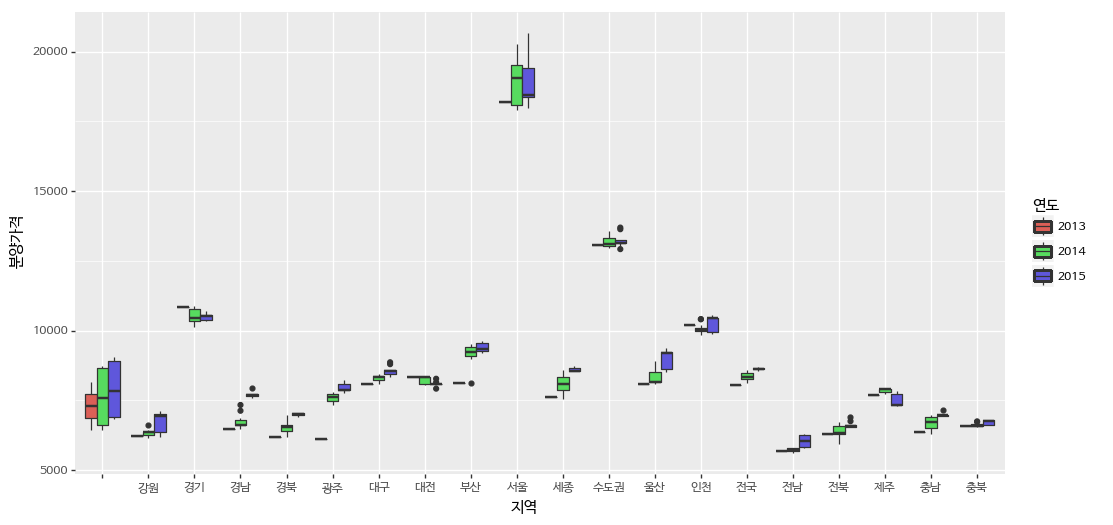

<ggplot: (292560795)>

In [61]:
(ggplot(df_2013_2015, aes(x='지역', y='분양가격', fill='연도'))
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(12, 6))
)

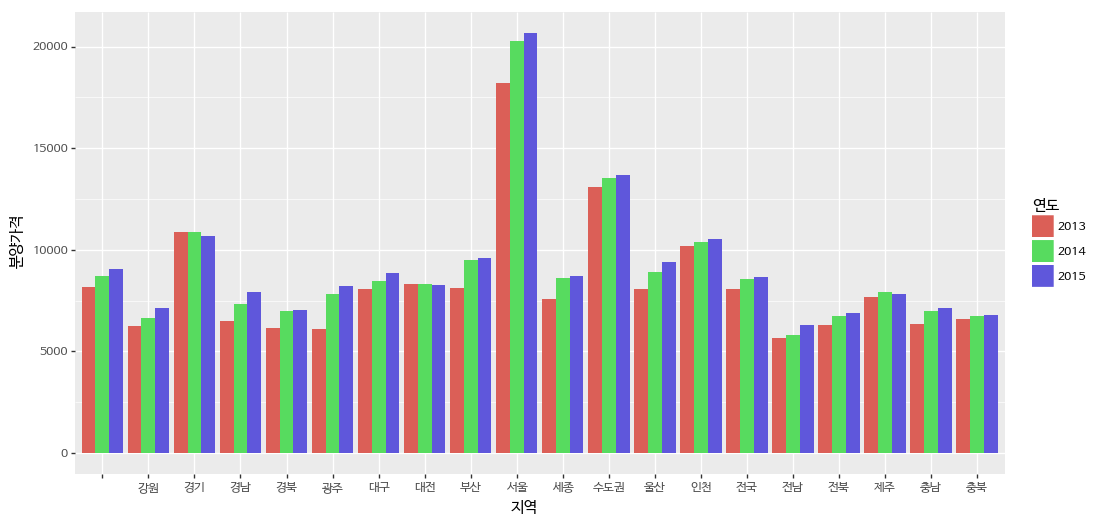

<ggplot: (292548563)>

In [62]:
(ggplot(df_2013_2015, aes(x='지역', y='분양가격', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(12, 6))
)

## 이제 2013년부터 2018년 7월까지 데이터를 합칠 준비가 됨

In [63]:
df_2015_2018 = pre_sale.loc[pre_sale['규모구분'] == '전체']
print(df_2015_2018.shape)
df_2015_2018.head()

(578, 7)


,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,"5,841","19,275"
5,인천,전체,2015,10,3163,"3,163","10,438"
10,경기,전체,2015,10,3138,"3,138","10,355"
15,부산,전체,2015,10,3112,"3,112","10,270"
20,대구,전체,2015,10,2682,"2,682","8,851"


In [64]:
df_2013_2015.columns

Index(['지역', '기간', '분양가', '연도', '월', '분양가격'], dtype='object')

In [65]:
df_2013_2015_prepare = df_2013_2015[['지역', '연도', '월', '분양가격']]
df_2013_2015_prepare.head()

,지역,연도,월,분양가격
0,전국,2013,12,8059
1,서울,2013,12,18189
2,부산,2013,12,8111
3,대구,2013,12,8080
4,인천,2013,12,10204


In [66]:
df_2013_2015_prepare.columns = ['지역명', '연도', '월', '평당분양가격']

In [67]:
df_2015_2018.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)', '분양가격', '평당분양가격'], dtype='object')

In [68]:
df_2015_2018_prepare = df_2015_2018[['지역명', '연도', '월', '평당분양가격']]
df_2015_2018_prepare.head()

,지역명,연도,월,평당분양가격
0,서울,2015,10,"19,275"
5,인천,2015,10,"10,438"
10,경기,2015,10,"10,355"
15,부산,2015,10,"10,270"
20,대구,2015,10,"8,851"


In [69]:
df_2015_2018_prepare.describe()

,평당분양가격
count,561
mean,"9,729"
std,"3,367"
min,"6,300"
25%,"7,498"
50%,"8,973"
75%,"10,560"
max,"22,833"


In [70]:
df_2013_2018 = pd.concat([df_2013_2015_prepare, df_2015_2018_prepare])
df_2013_2018.shape

(1040, 4)

In [71]:
df_2013_2018.head()

,지역명,연도,월,평당분양가격
0,전국,2013,12,"8,059"
1,서울,2013,12,"18,189"
2,부산,2013,12,"8,111"
3,대구,2013,12,"8,080"
4,인천,2013,12,"10,204"


In [72]:
df_2013_2018.tail()

,지역명,연도,월,평당분양가격
2865,전북,2018,7,"7,699"
2870,전남,2018,7,"7,778"
2875,경북,2018,7,"8,824"
2880,경남,2018,7,"8,897"
2885,제주,2018,7,"11,002"


In [73]:
df_2013_2015_region= df_2013_2015_prepare['지역명'].unique()
df_2013_2015_region

array(['전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '', '경기', '수도권',
       '세종', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [74]:
df_2015_2018_region = df_2015_2018_prepare['지역명'].unique()
df_2015_2018_region

array(['서울', '인천', '경기', '부산', '대구', '광주', '대전', '울산', '세종', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [75]:
exclude_region = [region for region in df_2013_2015_region if not region in df_2015_2018_region] 
exclude_region

['전국', '', '수도권']

In [76]:
df_2013_2018.shape

(1040, 4)

In [77]:
df_2013_2018.loc[df_2013_2018['지역명'].str.match('전국|수도권')].head()

,지역명,연도,월,평당분양가격
0,전국,2013,12,"8,059"
10,수도권,2013,12,"13,083"
21,전국,2014,1,"8,130"
31,수도권,2014,1,"12,995"
42,전국,2014,2,"8,195"


In [78]:
df_2013_2018.drop(df_2013_2018.loc[df_2013_2018['지역명'].str.match('전국|수도권')].index, axis=0, inplace=True)
df_2013_2018.drop(df_2013_2018.loc[df_2013_2018['지역명'] == ''].index, axis=0, inplace=True)

## 2013년 12월~2018년 7월 전국 신규 민간 아파트 분양가격 동향 시각화

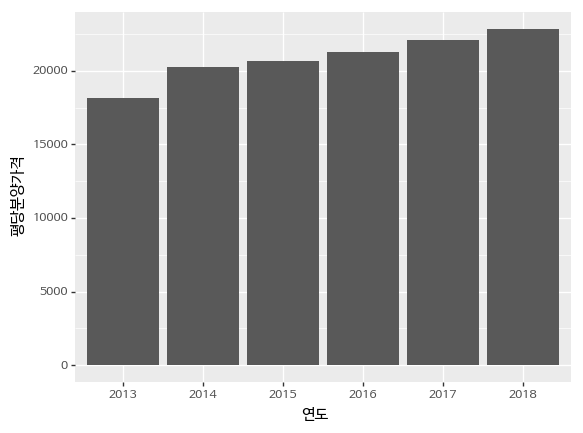

<ggplot: (293250778)>

In [79]:
(ggplot(df_2013_2018, aes(x='연도', y='평당분양가격'))
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family='NanumBarunGothic'))
)

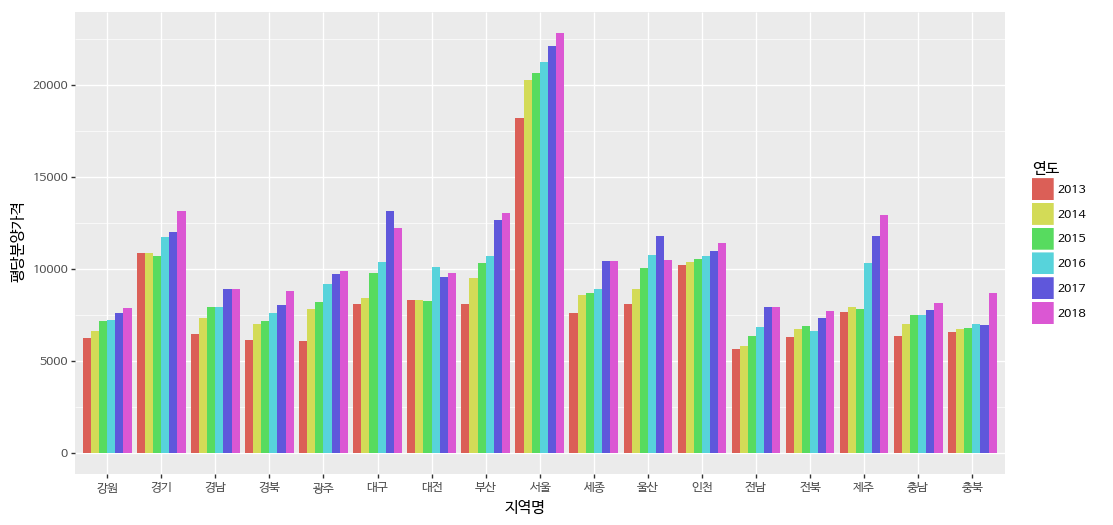

<ggplot: (292996658)>

In [80]:
(ggplot(df_2013_2018, aes(x='지역명', y='평당분양가격', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(12, 6))
)

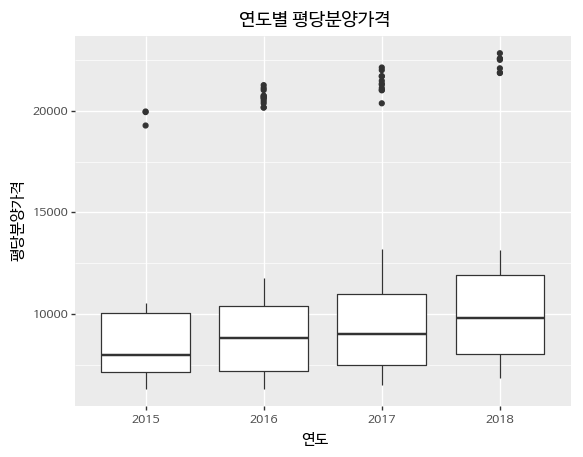

<ggplot: (-9223372036561916079)>

In [81]:
(ggplot(df_2015_2018_prepare)
 + aes(x='연도', y='평당분양가격')
 + ggtitle('연도별 평당분양가격')
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'))
)

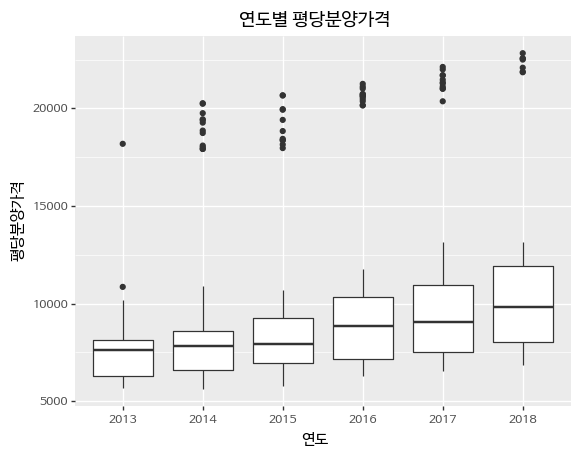

<ggplot: (292589888)>

In [82]:
(ggplot(df_2013_2018)
 + aes(x='연도', y='평당분양가격')
 + ggtitle('연도별 평당분양가격')
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'))
)

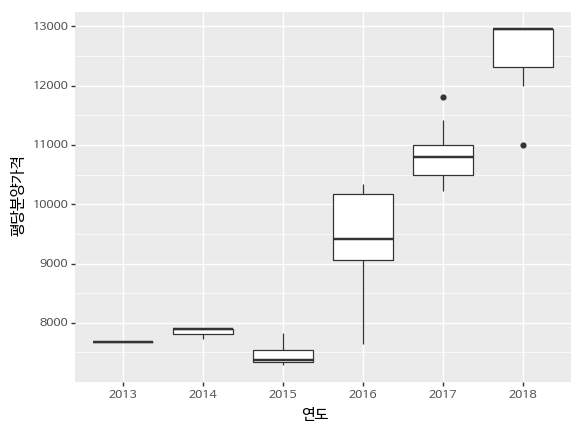

<ggplot: (294062263)>

In [83]:
df_2013_2018_jeju = df_2013_2018.loc[df_2013_2018['지역명'] == '제주']
(ggplot(df_2013_2018_jeju)
 + aes(x='연도', y='평당분양가격')
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'))
)

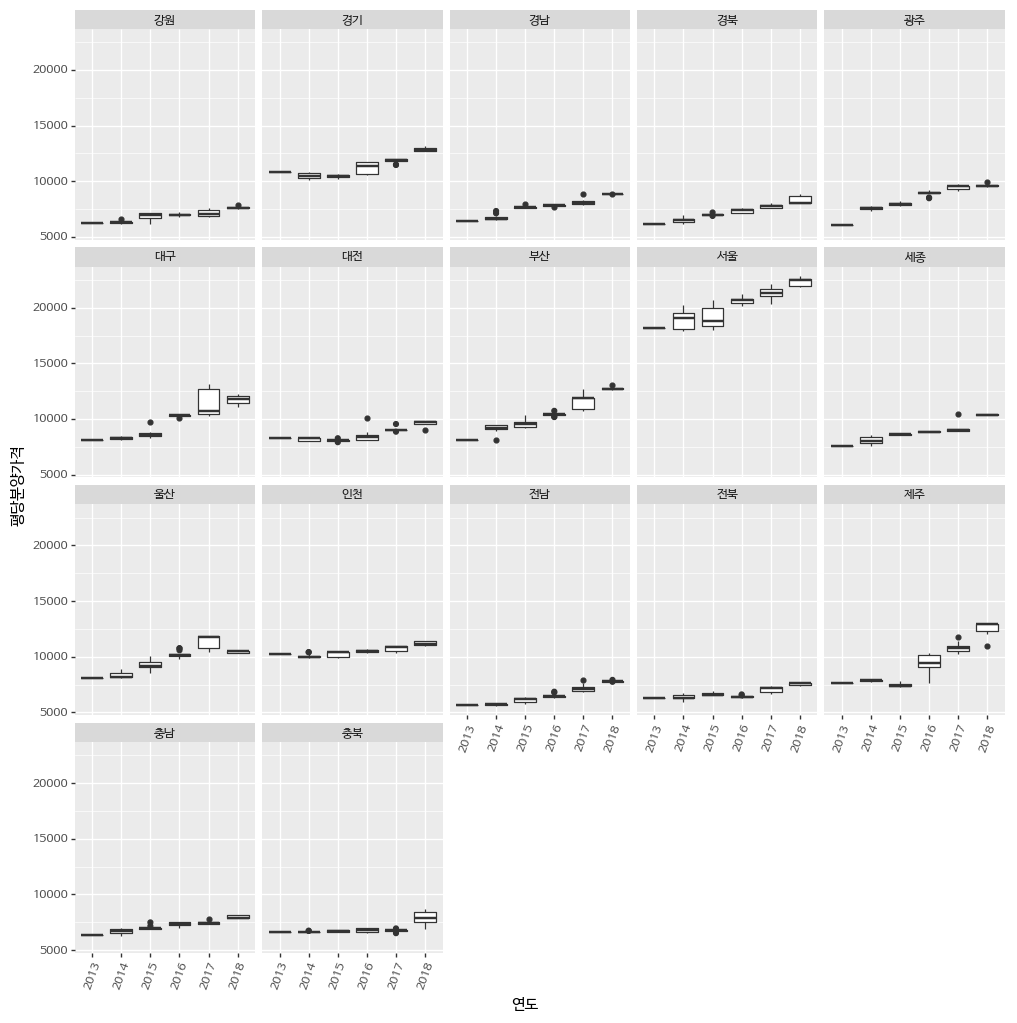

<ggplot: (-9223372036560899335)>

In [84]:
(ggplot(df_2013_2018)
 + aes(x='연도', y='평당분양가격')
 + geom_boxplot()
 + facet_wrap('지역명')
 + theme(text=element_text(family='NanumBarunGothic'),
         axis_text_x=element_text(rotation=70),
         figure_size=(12, 12))
)